In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = 'd:/Git_Proyects/Tesis/Base_Twitter/Tw_meses/'

In [11]:
Tw = pd.read_csv(path+'Tweets_October.csv')

C:\Users\Ale\AppData\Local\Temp\ipykernel_16504\1603692999.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  Tw = pd.read_csv(path+'Tweets_October.csv')


In [12]:
Tw = Tw.dropna(subset=['Tweets'])
Tw = Tw.dropna(subset=['Fecha'])
len(Tw)

7421808

In [13]:
Tw['Fecha'] = pd.to_datetime(Tw['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y', errors='coerce')

In [34]:
df_index = Tw.set_index('Fecha')
df_count_hora = df_index.resample('1H').count()
df_suavizado = df_count_hora.rolling('1D', center = True).mean()


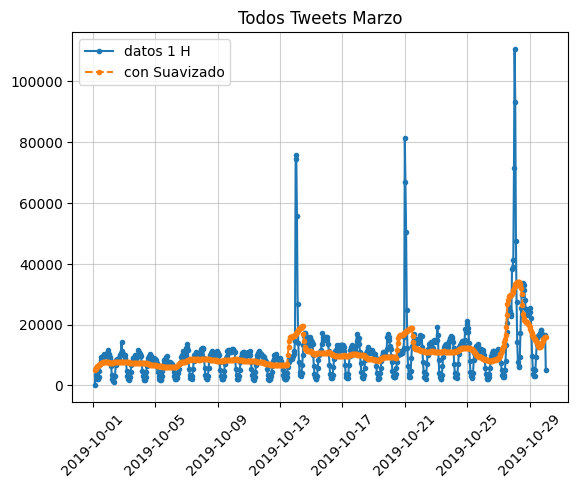

In [35]:
plt.figure()
plt.title('Todos Tweets Marzo')

plt.plot(df_count_hora.index, df_count_hora['Tweets'], '.-', label  = 'datos 1 H')
plt.plot(df_suavizado.index, df_suavizado['Tweets'], '.--', label = 'con Suavizado')
plt.legend()
plt.grid(alpha = 0.6)
#plt.yscale('log')
plt.xticks(rotation = 45)
#plt.savefig(path+'Todos_datos_marzo.png', dpi = 1000)
plt.show()

In [32]:
np.where(np.array(df_count_hora['Tweets'])>400000)

(array([13, 20, 27], dtype=int64),)

In [33]:
df_count_hora.index[27]

Timestamp('2019-10-28 00:00:00')